In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_classification

make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

In [3]:
train_X, train_y = make_classification(n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_classes=3,
                                       n_clusters_per_class=1,
                                       random_state=42)

train_X.shape, train_y.shape

((100, 2), (100,))

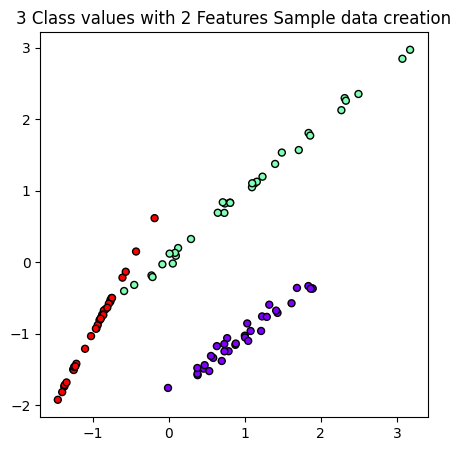

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title("3 Class values with 2 Features Sample data creation")
plt.scatter(train_X[:, 0], train_X[:, 1],
            marker='o', c=train_y, s=25, cmap='rainbow', edgecolor='k')

In [5]:
import numpy as np

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

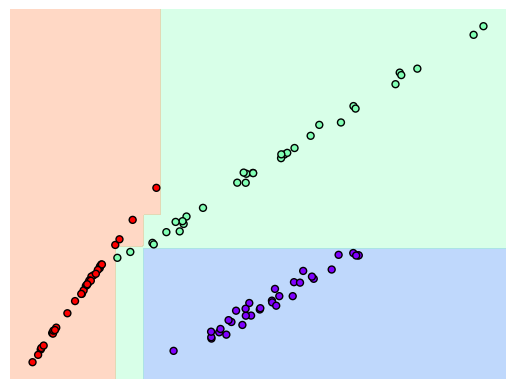

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(train_X, train_y)
visualize_boundary(dt_clf, train_X, train_y)

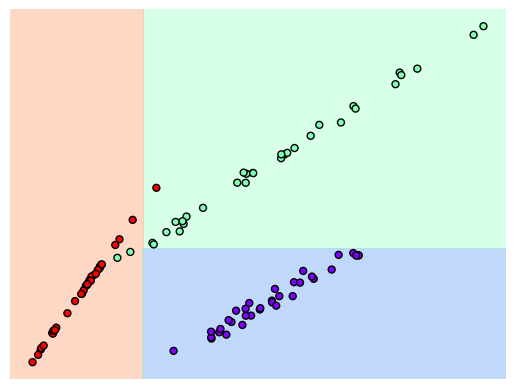

In [7]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(train_X, train_y)
visualize_boundary(dt_clf, train_X, train_y)